# Housing Prices Case Study

Problem Statement:  

Consider a real estate company that has a dataset containing the prices of properties in the Delhi region. It wishes to use the   data to optimise the sale prices of the properties based on important factors such as area, bedrooms, parking, etc.  

Essentially, the company wants —  

1.To identify the variables affecting house prices, e.g. area, number of rooms, bathrooms, etc.  

2.To create a linear model that quantitatively relates house prices with variables such as number of rooms, area, number of   bathrooms, etc.  

3.To know the accuracy of the model, i.e. how well these variables can predict house prices.  

**Importing and Understanding Data**

In [407]:
import pandas as pd
import numpy as np

In [408]:
# Importing the dataset- Housing.csv
housing = pd.read_csv('Housing (1).csv')

In [409]:
# Looking at the first five rows
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [410]:
# Checking what type of values are stored in the columns
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


**Data Preparation**

As we can see that the dataset has many columns with values as 'Yes' or 'No'.  

So, we need to convert them to 1s and 0s, where 1 is a 'Yes' and 0 is a 'No'.  

In [411]:
# Converting Yes to 1 and No to 0
housing['mainroad'] = housing['mainroad'].map({'yes': 1, 'no': 0})
housing['guestroom'] = housing['guestroom'].map({'yes': 1, 'no': 0})
housing['basement'] = housing['basement'].map({'yes': 1, 'no': 0})
housing['hotwaterheating'] = housing['hotwaterheating'].map({'yes': 1, 'no': 0})
housing['airconditioning'] = housing['airconditioning'].map({'yes': 1, 'no': 0})
housing['prefarea'] = housing['prefarea'].map({'yes': 1, 'no': 0})

In [412]:
# Now let's look at the head of the dataset
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished


The variable 'furnishingstatus' has three levels. So, we need to convert it to integer.  

In [413]:
# Creating a dummy variable for 'furnishingstatus'
status = pd.get_dummies(housing['furnishingstatus'])

In [414]:
# The result has created three variables that are not needed.
status.head()

,furnished,semi-furnished,unfurnished
0,1,0,0
1,1,0,0
2,0,1,0
3,1,0,0
4,1,0,0


In [415]:
# we don't need 3 columns.
# we can use drop_first = True to drop the first column from status df.
status = pd.get_dummies(housing['furnishingstatus'],drop_first=False)
status

,furnished,semi-furnished,unfurnished
0,1,0,0
1,1,0,0
2,0,1,0
3,1,0,0
4,1,0,0
...,...,...,...
540,0,0,1
541,0,1,0
542,0,0,1
543,1,0,0


In [416]:
#Adding the results to the master dataframe
housing = pd.concat([housing,status],axis=1)

In [417]:
# Now let's see the head of our dataframe.
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,furnished,semi-furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished,1,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished,1,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished,0,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished,1,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished,1,0,0


In [418]:
# Dropping furnishingstatus as we have created the dummies for it
housing.drop(['furnishingstatus'],axis=1,inplace=True)

# Now let's see the head of our dataframe.
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnished,semi-furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,1,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,1,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,0,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,1,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,1,0,0


**Rescaling the Features**

It is extremely important to rescale the variables so that they have a comparable scale. There are two ways of rescaling  

1. Normalisation (min-max scaling) and  
2. Standardisation (mean-o, sigma-1)  

Let's try normalisation  

In [419]:
#defining a normalisation function 
def normalize (x): 
    return ( (x-np.min(x))/ (max(x) - min(x)))
                                            
                                              
# applying normalize ( ) to all columns 
housing = housing.apply(normalize) 

**Splitting Data into Training and Testing Sets**

In [420]:
housing.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnished', 'semi-furnished', 'unfurnished'],
      dtype='object')

In [421]:
# Putting feature variable to X
X = housing[['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnished', 'semi-furnished', 'unfurnished']]

# Putting response variable to y
y = housing['price']

In [422]:
#random_state is the seed used by the random number generator, it can be any integer.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7 ,test_size = 0.3, random_state=100)

**Building a linear model**

In [423]:
import statsmodels.api as sm          # Importing statsmodels
X_train = sm.add_constant(X_train)    # Adding a constant column to our dataframe
# create a first fitted model
lm_1 = sm.OLS(y_train,X_train).fit()

In [424]:
#Let's see the summary of our first linear model
print(lm_1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.681
Model:                            OLS   Adj. R-squared:                  0.670
Method:                 Least Squares   F-statistic:                     60.40
Date:                Sun, 29 Jan 2023   Prob (F-statistic):           8.83e-83
Time:                        14:52:47   Log-Likelihood:                 381.79
No. Observations:                 381   AIC:                            -735.6
Df Residuals:                     367   BIC:                            -680.4
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0046      0.014     

**Checking VIF**

In [425]:
# UDF for calculating vif value
def vif_cal(input_data, dependent_col):
    vif_df = pd.DataFrame( columns = ['Var', 'Vif'])
    x_vars=input_data.drop([dependent_col], axis=1)
    xvar_names=x_vars.columns
    for i in range(0,xvar_names.shape[0]):
        y=x_vars[xvar_names[i]] 
        x=x_vars[xvar_names.drop(xvar_names[i])]
        rsq=sm.OLS(y,x).fit().rsquared  
        vif=round(1/(1-rsq),2)
        vif_df.loc[i] = [xvar_names[i], vif]
    return vif_df.sort_values(by = 'Vif', axis=0, ascending=False, inplace=False)

In [426]:
# Calculating Vif value|
vif_cal(input_data=housing, dependent_col="price")

,Var,Vif
12,semi-furnished,7.48
11,furnished,5.43
13,unfurnished,5.28
3,stories,1.48
1,bedrooms,1.37
0,area,1.33
6,basement,1.32
2,bathrooms,1.29
5,guestroom,1.21
8,airconditioning,1.21


**Correlation matrix**

In [427]:
# Importing matplotlib and seaborn
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<AxesSubplot: >

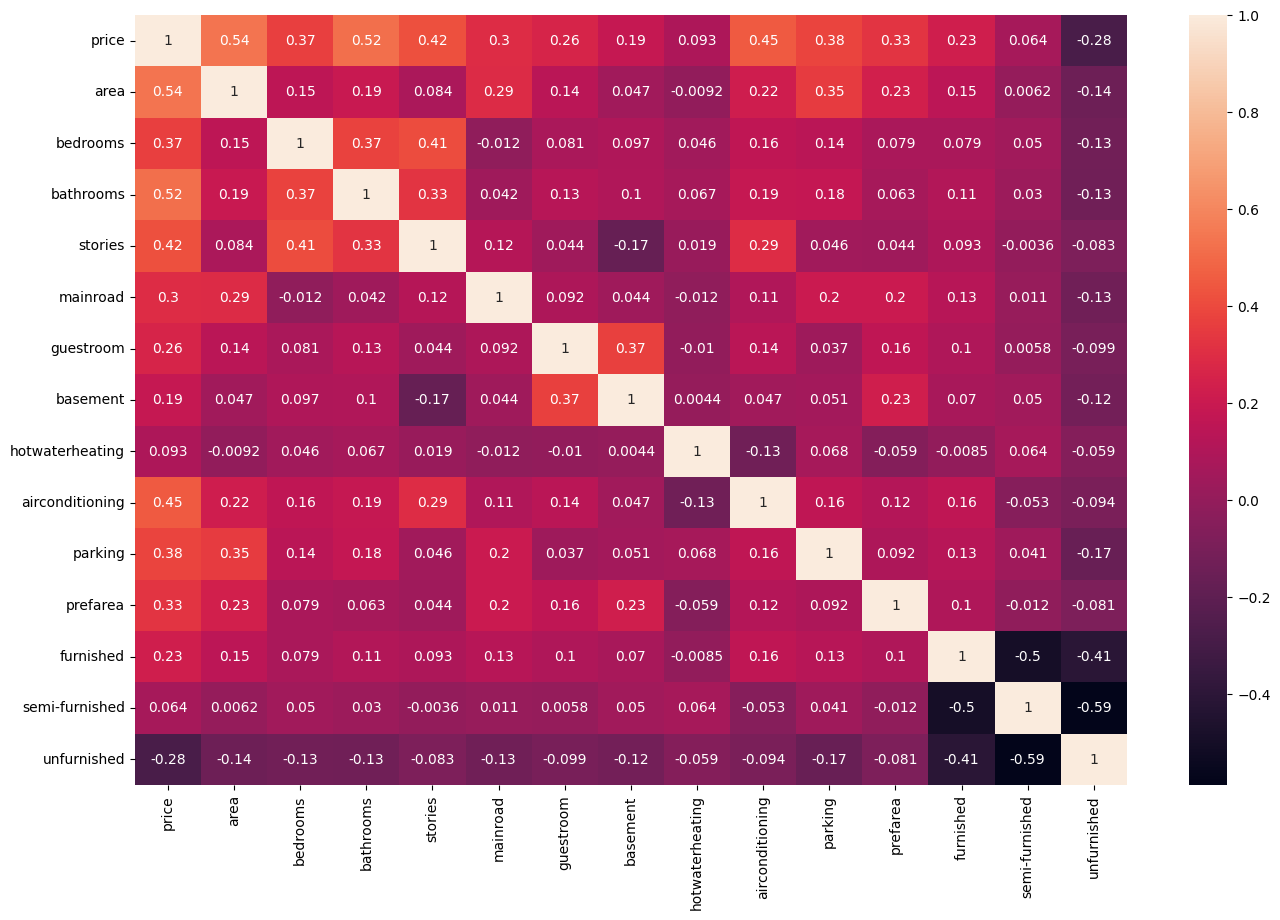

In [428]:
# Let's see the correlation matrix 
plt.figure(figsize = (16,10))     # Size of the figure
sns.heatmap(housing.corr(),annot = True)

**Dropping the Variable and Updating the Model**

In [429]:
# # Dropping highly correlated variables and insignificant variables
X_train = X_train.drop('bedrooms',axis=1)

In [430]:
# Create a fourth fitted model
lm_2 = sm.OLS(y_train,X_train).fit()

In [431]:
#Let's see the summary of our fourth linear model
print(lm_2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.680
Model:                            OLS   Adj. R-squared:                  0.670
Method:                 Least Squares   F-statistic:                     65.20
Date:                Sun, 29 Jan 2023   Prob (F-statistic):           2.35e-83
Time:                        14:52:48   Log-Likelihood:                 380.96
No. Observations:                 381   AIC:                            -735.9
Df Residuals:                     368   BIC:                            -684.7
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0157      0.011     

In [432]:
# Calculating Vif value
vif_cal(input_data=housing.drop(["bedrooms"], axis=1), dependent_col="price")

,Var,Vif
11,semi-furnished,4.60
10,furnished,3.69
12,unfurnished,3.23
0,area,1.32
2,stories,1.30
5,basement,1.30
1,bathrooms,1.22
4,guestroom,1.21
7,airconditioning,1.21
8,parking,1.21


**Dropping the Variable and Updating the Model**

In [433]:
# # Dropping highly correlated variables and insignificant variables
X_train = X_train.drop('semi-furnished', axis=1)

In [434]:
# Create a fifth fitted model
lm_2 = sm.OLS(y_train,X_train).fit()

In [435]:
#Let's see the summary of our fifth linear model
print(lm_2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.680
Model:                            OLS   Adj. R-squared:                  0.670
Method:                 Least Squares   F-statistic:                     65.20
Date:                Sun, 29 Jan 2023   Prob (F-statistic):           2.35e-83
Time:                        14:52:48   Log-Likelihood:                 380.96
No. Observations:                 381   AIC:                            -735.9
Df Residuals:                     368   BIC:                            -684.7
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0321      0.015     

In [436]:
# Calculating Vif value
vif_cal(input_data=housing.drop(["bedrooms","semi-furnished"], axis=1), dependent_col="price")

,Var,Vif
3,mainroad,5.06
0,area,4.40
2,stories,2.31
8,parking,1.99
5,basement,1.86
7,airconditioning,1.77
1,bathrooms,1.62
10,furnished,1.61
11,unfurnished,1.51
9,prefarea,1.49


**Dropping the Variable and Updating the Model**

In [437]:
# # Dropping highly correlated variables and insignificant variables
X_train = X_train.drop('mainroad',axis= 1)

In [438]:
# Create a sixth fitted model
lm_3 = sm.OLS(y_train,X_train).fit()

#Let's see the summary of our sixth linear model
print(lm_3.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.670
Model:                            OLS   Adj. R-squared:                  0.660
Method:                 Least Squares   F-statistic:                     68.09
Date:                Sun, 29 Jan 2023   Prob (F-statistic):           8.13e-82
Time:                        14:52:48   Log-Likelihood:                 375.00
No. Observations:                 381   AIC:                            -726.0
Df Residuals:                     369   BIC:                            -678.7
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0636      0.012     

In [439]:
# Calculating Vif value
vif_cal(input_data=housing.drop(["bedrooms","semi-furnished","mainroad"], axis=1), dependent_col="price")

,Var,Vif
0,area,3.38
2,stories,2.09
7,parking,1.94
4,basement,1.78
6,airconditioning,1.77
1,bathrooms,1.61
9,furnished,1.54
8,prefarea,1.48
3,guestroom,1.47
10,unfurnished,1.37


**Making Predictions Using the Final Model**

**Prediction with Model 3**

In [440]:
# Adding  constant variable to test dataframe
X_test_m3 = sm.add_constant(X_test)

# Creating X_test_m6 dataframe by dropping variables from X_test_m6
X_test_m3 = X_test_m3.drop(["bedrooms","semi-furnished","mainroad"], axis=1)

# Making predictions
y_pred_m3 = lm_3.predict(X_test_m3)

**Model Evaluation**

Text(0, 0.5, 'Housing Price')

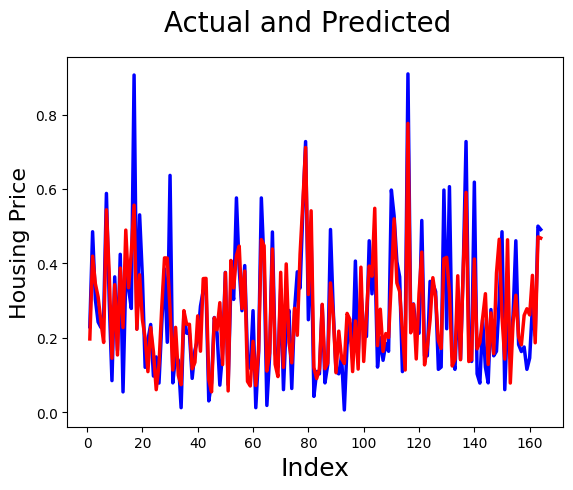

In [441]:
# Actual vs Predicted
c = [i for i in range(1,165,1)]
fig = plt.figure()
plt.plot(c,y_test, color="blue", linewidth=2.5, linestyle="-")     #Plotting Actual
plt.plot(c,y_pred_m3, color="red",  linewidth=2.5, linestyle="-")  #Plotting predicted
fig.suptitle('Actual and Predicted', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                               # X-label
plt.ylabel('Housing Price', fontsize=16)                       # Y-label

Text(0, 0.5, 'y_pred')

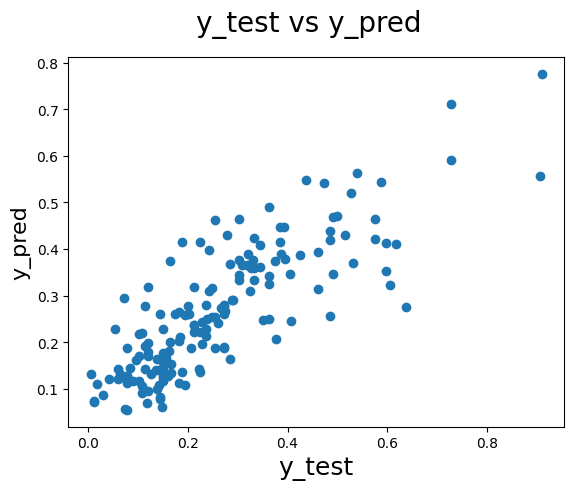

In [442]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred_m3)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

Text(0, 0.5, 'ytest-ypred')

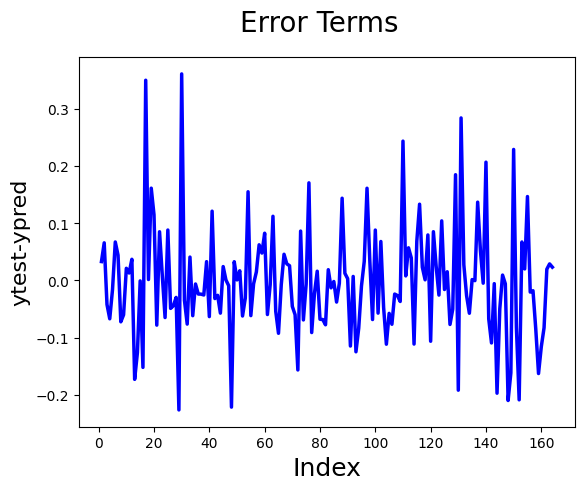

In [443]:
# Error terms
fig = plt.figure()
c = [i for i in range(1,165,1)]
plt.plot(c,y_test-y_pred_m3, color="blue", linewidth=2.5, linestyle="-")
fig.suptitle('Error Terms', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                      # X-label
plt.ylabel('ytest-ypred', fontsize=16)                # Y-label

Text(13.819444444444445, 0.5, 'Index')

<Figure size 640x480 with 0 Axes>

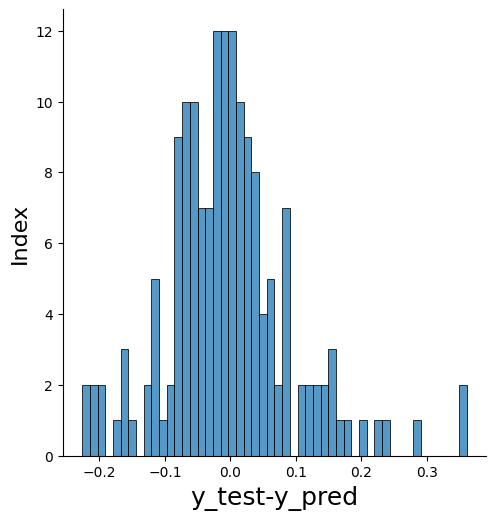

In [444]:
# Plotting the error terms to understand the distribution.
fig = plt.figure()
sns.displot((y_test-y_pred_m3),bins=50)
fig.suptitle('Error Terms', fontsize=20)                  # Plot heading 
plt.xlabel('y_test-y_pred', fontsize=18)                  # X-label
plt.ylabel('Index', fontsize=16)                          # Y-label

In [445]:
import numpy as np
from sklearn import metrics
print('RMSE :', np.sqrt(metrics.mean_squared_error(y_test, y_pred_m3)))

RMSE : 0.0971440598584073
